In [1]:
import sys

if ".." not in sys.path:
    sys.path.append("..")

import os
import PIL.Image as Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from collections import defaultdict
from time import process_time

from common.task import path_join, load_ground_truths, get_best_bag_of_features_histograms

%load_ext autoreload
%autoreload 2
%matplotlib widget
%matplotlib inline

In [2]:
img_path = '2700270'
n_centroids = 100
step_size = 50
# load ground truth for image 2700270.png
visual_words = load_ground_truths('2700270.gtp') 
visual_word = visual_words[3]
print(f"{visual_word=}")

visual_word=(800, 166, 1007, 246, 'and')


In [3]:
rv = get_best_bag_of_features_histograms('2700270.png', visual_word[:4], n_centroids, step_size)

# Visualization

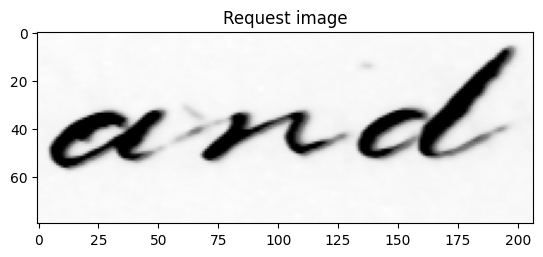

In [4]:
x1, y1, x2, y2, _ = visual_word
document = Image.open(path_join('pages', '2700270.png'))
doc_arr = np.asarray(document, dtype='uint8')
req_arr = doc_arr[y1:y2, x1:x2]

plt.imshow(req_arr, cmap=cm.get_cmap("Greys_r"))
plt.title("Request image")
plt.show()

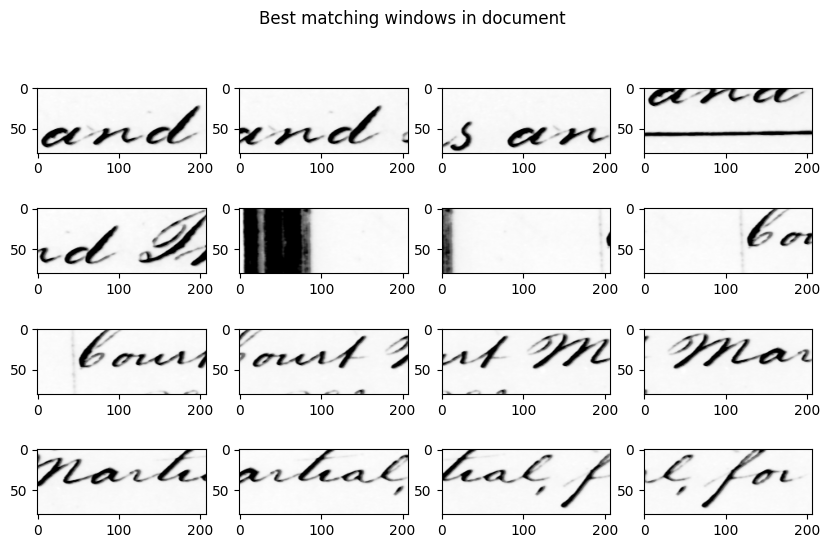

In [5]:
row_cols = 4
fig = plt.figure(figsize=(10, 6))
fig.suptitle("Best matching windows in document")

for idx, info in enumerate(rv):
    if idx == row_cols**2:
        break

    wx, wy, wxx, wyy = info['window']
    ax = fig.add_subplot(row_cols, row_cols, idx + 1)
    subimg = doc_arr[wy:wyy, wx:wxx]
    ax.imshow(subimg, cmap=cm.get_cmap('Greys_r'))

# Evaluation

In [6]:
from common.evaluation import SegmentfreeWordSpottingEvaluator

# 3 - and
# 4 - instructions

img_path = '2700270.png'
n_centroids = 100
step_size = 30
word_index = 0
max_eval_length = 10

sfwse = SegmentfreeWordSpottingEvaluator(
    img_path,
    n_centroids,
    step_size
)

result = sfwse.crossvalidate(word_index, max_eval_length)
prec, rec, mean_prec = result
print(f"{prec=} {rec=} {mean_prec=}")

Evaluating word (116, 171, 255, 237, '270')
prec=0.4 rec=4.0 mean_prec=4.0


In [8]:
from common.evaluation import SegmentfreeWordSpottingEvaluator

max_eval_length = 10

sfwse = SegmentfreeWordSpottingEvaluator(
    img_path='2700270.png',
    n_centroids=100,
    step_size=30
)

start_time = process_time()
avg_prec, avg_rec, avg_mean_prec, overall_precision, overall_recall, overall_mean_prec = sfwse.validate(max_eval_length)
end_time = process_time()

print(f"Needed time: {(end_time - start_time)} secs")
print(f"{avg_prec=} {avg_rec=} {avg_mean_prec=}")
print(f"{overall_precision=}")
print(f"{overall_recall=}")
print(f"{overall_mean_prec=}")

Evaluating 2700270.png with 215 words
Validating image '2700270.png' with word 0
Evaluating word (116, 171, 255, 237, '270')
Validating image '2700270.png' with word 1
Evaluating word (251, 146, 499, 249, 'letters')
Validating image '2700270.png' with word 2
Evaluating word (519, 166, 771, 246, 'orders')
Validating image '2700270.png' with word 3
Evaluating word (800, 166, 1007, 246, 'and')
Validating image '2700270.png' with word 4
Evaluating word (1019, 139, 1570, 237, 'instructions')
Validating image '2700270.png' with word 5
Evaluating word (1568, 146, 1814, 246, 'october')
Validating image '2700270.png' with word 6
Evaluating word (1812, 159, 1958, 233, '1755')
Validating image '2700270.png' with word 7
Evaluating word (264, 327, 423, 450, 'only')
Validating image '2700270.png' with word 8
Evaluating word (436, 330, 567, 434, 'for')
Validating image '2700270.png' with word 9
Evaluating word (580, 319, 723, 406, 'the')
Validating image '2700270.png' with word 10
Evaluating word (71